## Participants questionnaire data 
at location  /opt/data/optimax_sensing/Klinische\ Variabeln_Gesamt_220120_LA.sav


from columns:
- OASIS_PRE	
- BAI_PRE
- BAI_POST2
- OASIS_POST2
- BAI_POST
- OASIS_POST
- BAI_MID2
- OASIS_MID2
- BAI_MID
- OASIS_MID 




In [15]:
import pandas as pd
import re
import numpy as np

QU_PRE = "/opt/data/optimax_sensing/unipark_old/PRE_Klinische Variabeln_Gesamt_220120_LA.csv"
HAMA_PRE = "/opt/data/optimax_sensing/hama/OPTIMAX_MINI_PRE_alle_220120_LA.xlsx"
QU_MID = "/opt/data/optimax_sensing/unipark/MID_Gesamtfile_090422_AJ.sav"
HAMA_MID = "/opt/data/optimax_sensing/hama/OPTIMAX_MINI_MID1_alle_08042022_AJ.xlsx"
QU_POST = "/opt/data/optimax_sensing/unipark/Post_Gesamt_20220302_LA.sav"
HAMA_POST = "/opt/data/optimax_sensing/hama/OPTIMAX_MINI_Post1_alle_220311_AJ.xlsx"

paths = [QU_PRE,HAMA_PRE, QU_MID,HAMA_MID, QU_POST,HAMA_POST]

def extract_columns(path): 
    if path[-3:] == 'csv':
        df = pd.read_csv(path,sep = ';')

    elif path[-3:] == 'sav':
        #df = pd.read_csv(path,sep = ';', encoding="windows-1252")
        #df.rename(columns={'ï»¿VP': 'VP'}, inplace=True)
        df = pd.read_spss(path)

    elif path[-3:] == 'lsx':
        df = pd.read_excel(path, sheet_name='HAMA', engine='openpyxl')
        name = 'HAMA_'+ path.split('/')[-1].split('_')[2]
        df = df.rename(columns={'Pat.Code': 'VP', 'Summe':name+'_SEVERITY', 'Summe quantitativ':name})
        df = df[df['VP'].notna()]
        #{1: 'Leicht erhöhter', 2:'Deutlich erhöhter', 3: 'Stark erhöhter'}

    cols = ["VP", "OASIS_PRE", "BAI_PRE", "BAI_POST2", "OASIS_POST2", "BAI_POST", "OASIS_POST", "BAI_MID2", "OASIS_MID2", "BAI_MID", "OASIS_MID",
    "HAMA_PRE","HAMA_PRE_SEVERITY","HAMA_MID1","HAMA_MID1_SEVERITY","HAMA_Post1","HAMA_Post1_SEVERITY"]
    df = df[[i for i in cols if i in set(df.columns)]]
    df["VP"] = [re.findall(r'[0-9]+', str(i), flags=0)[0] for i in df['VP']] #make participant id a numeric string 
    return df

def create_quest_df():
    df = extract_columns(paths[0])
    for path in paths[1:]:
        df = df.merge(extract_columns(path), how = 'outer', on = ['VP'])
    return df

In [16]:
df = create_quest_df()
df

,VP,OASIS_PRE,BAI_PRE,HAMA_PRE,HAMA_PRE_SEVERITY,BAI_MID,OASIS_MID,HAMA_MID1,HAMA_MID1_SEVERITY,BAI_POST,OASIS_POST,HAMA_Post1,HAMA_Post1_SEVERITY
0,102,11.0,,23,2 Deutlich erhöhter,NaN,10.0,16.0,1,3.0,3.0,9.0,0
1,101,17.0,,31,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104,11.0,,31,3,5.0,2.0,2.0,0,6.0,2.0,4.0,NaN
3,107,7.0,,24,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109,11.0,,26,2 Deutlich erhöhter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,494,6.0,14,20,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,503,7.0,13,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,480,9.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,426,NaN,NaN,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
import re 
print(set([int(re.findall(r'[0-9]+', i, flags=0)[0]) for i in df['VP']]))

{101, 102, 104, 105, 106, 107, 109, 113, 114, 115, 116, 117, 118, 121, 123, 124, 128, 129, 130, 131, 133, 134, 135, 136, 137, 140, 141, 142, 146, 147, 149, 150, 151, 152, 154, 155, 156, 157, 158, 160, 161, 162, 164, 166, 168, 169, 170, 171, 173, 174, 175, 177, 178, 179, 181, 182, 184, 186, 188, 189, 190, 194, 195, 196, 197, 198, 199, 200, 201, 204, 207, 208, 210, 213, 214, 215, 216, 217, 218, 219, 220, 226, 227, 229, 230, 233, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 255, 257, 258, 261, 262, 263, 264, 265, 266, 267, 268, 269, 271, 273, 275, 277, 279, 282, 283, 284, 285, 286, 288, 290, 291, 292, 294, 295, 296, 297, 298, 299, 302, 310, 311, 312, 313, 315, 316, 317, 319, 323, 325, 326, 333, 335, 336, 340, 344, 345, 346, 348, 349, 350, 351, 352, 354, 355, 366, 369, 370, 371, 372, 374, 376, 382, 383, 387, 392, 393, 394, 396, 400, 401, 404, 405, 407, 408, 409, 411, 413, 415, 416, 417, 418, 421, 423, 424, 425, 426, 427, 428, 429, 430, 431, 433, 434, 439, 441,

In [18]:
import re 
parta = ['p102', 'p104', 'p124', 'p131', 'p134', 'p141', 'p149', 'p154', 'p166', 'p170', 'p181', 'p194', 'p201', 'p208', 'p230', 'p255', 'p261', 'p262', 'p263', 'p265', 'p273', 'p284', 'p310', 'p319', 'p326', 'p333', 'p355', 'p366', 'p369', 'p376', 'p383', 'p393', 'p400']
pspart = set([str(i[1:]) for i in parta]) #ones in ps dataset 

missing = pspart - set([str(re.findall(r'[0-9]+', i, flags=0)[0]) for i in df['VP']])  #no missing participants in questionnaire dataset 
missing

set()

In [19]:
df = df[df['VP'].isin(pspart)] # only include passive sensing participants
#df = df.drop(labels='level_0', axis=1)
df.reset_index(inplace=True, drop=True)
df = df.drop([31,9,34],axis=0) #duplicate value for participants, to be removed
df.replace(' ', np.NaN, inplace=True)
df["BAI_PRE"] = pd.to_numeric(df["BAI_PRE"])
df["HAMA_PRE"] = pd.to_numeric(df["HAMA_PRE"])

#impute values for BAI_pre that are missing for some participants 
df["BAI_PRE"].fillna(df["BAI_PRE"].mean(),inplace = True)

#df.to_csv('/home/jmocel/trelium/OPTIMAX-sensing/processed_data/questionnaireGT_final.csv')

In [20]:
def compute_perc_change():
    df['HAMA_perc_change'] = (df['HAMA_PRE'] - df['HAMA_Post1'])/df['HAMA_PRE']*-100
    df['OASIS_perc_change'] = (df['OASIS_PRE'] - df['OASIS_POST'])/df['OASIS_PRE']*-100
    df['BAI_perc_change'] = (df['BAI_PRE'] - df['BAI_POST'])/df['BAI_PRE']*-100
    return 

def compute_nonclinical():
    #  BAI,HAMA: we classify as nonclinical (return 1) a questionnaire score that is within 1sd from the control group's questionnaire mean (according to Loerinc etal)
    #  compute mean and std of questionnaires for wait group 
    waitgroup = ['131','208','262','284','319','366','393']
    std_dev = df.loc[df['VP'].isin(waitgroup)].std()  
    mean = df.loc[df['VP'].isin(waitgroup)].mean()
    for column in ['HAMA_Post1','BAI_POST']:
        df[column+'_nonclinical'] = [1 if i > mean[column]-std_dev[column] and i < mean[column]+std_dev[column] else 0 for i in df[column]]
    #  OASIS:  we classify as nonclinical (return 1) a questionnaire score < 8
    df['OASIS_POST_nonclinical'] = [1 if i<8 else 0 for i in df['OASIS_POST']]

    return 

def compute_RCI():
    #An RC larger than 1.96 would be unlikely to occur (p < .05) with- out actual change
    #oasis: sd = 3.27, test-retest = 0.864
    den = np.sqrt(2*(3.27*np.sqrt(1-0.864))**2)
    df['OASIS_RCI'] = (df['OASIS_PRE'] - df['OASIS_POST'])/den
    df['OASIS_RCI_responder'] = [1 if i > 1.96 else 0 for i in df['OASIS_RCI']]
    #df['OASIS_strict_responder'] = [1 if r == 1 and t <= 8  else 0 for r,t in zip(df['OASIS_RCI_responder'],df['OASIS_POST'])]
    #bai: sd nonclinical = 9.6, test-retest =0.75
    den_bai = np.sqrt(2*(9.6*np.sqrt(1-0.75))**2)
    df['BAI_RCI'] = (df['BAI_PRE'] - df['BAI_POST'])/den_bai
    df['BAI_RCI_responder'] = [1 if i > 1.96 else 0 for i in df['BAI_RCI']]
    #bai: sd nonclinical = 4.52, inter rater reliability =0.52
    den_hama = np.sqrt(2*(4.52*np.sqrt(1-0.52))**2)
    df['HAMA_RCI'] = (df['HAMA_PRE'] - df['HAMA_Post1'])/den_hama
    df['HAMA_RCI_responder'] = [1 if i > 1.96 else 0 for i in df['HAMA_RCI']]

    df['RCI_responder'] = [1 if i+j+z>=2 else 0 for i,j,z in zip(df['OASIS_RCI_responder'],df['BAI_RCI_responder'],df['HAMA_RCI_responder'])]

In [21]:
#df = df.astype({"OASIS_PRE": float, "HAMA_PRE": float})
#waitgroup = ['131','208','262','284','319','366','393']
#std_dev = df.loc[df['VP'].isin(waitgroup)].std()['OASIS_PRE']
#mean = df.loc[df['VP'].isin(waitgroup)].mean()['OASIS_POST','HAMA_Post1','BAI_POST']

In [22]:
compute_nonclinical()
compute_perc_change()
compute_RCI()
df.columns = ['VP', 'OASIS_PRE', 'BAI_PRE', 'HAMA_PRE', 'HAMA_PRE_SEVERITY',
       'BAI_MID', 'OASIS_MID', 'HAMA_MID', 'HAMA_MID_SEVERITY', 'BAI_POST',
       'OASIS_POST', 'HAMA_POST', 'HAMA_POST_SEVERITY',
       'HAMA_POST_nonclinical', 'BAI_POST_nonclinical',
       'OASIS_POST_nonclinical', 'HAMA_perc_change', 'OASIS_perc_change',
       'BAI_perc_change','OASIS_RCI','OASIS_RCI_responder','BAI_RCI','BAI_RCI_responder','HAMA_RCI','HAMA_RCI_responder','RCI_responder']
df


,VP,OASIS_PRE,BAI_PRE,HAMA_PRE,HAMA_PRE_SEVERITY,BAI_MID,OASIS_MID,HAMA_MID,HAMA_MID_SEVERITY,BAI_POST,...,HAMA_perc_change,OASIS_perc_change,BAI_perc_change,OASIS_RCI,OASIS_RCI_responder,BAI_RCI,BAI_RCI_responder,HAMA_RCI,HAMA_RCI_responder,RCI_responder
0,102,11.0,24.148148,23,2 Deutlich erhöhter,NaN,10.0,16.0,1,3.0,...,-60.869565,-72.727273,-87.576687,4.690917,1,3.115416,1,3.161215,1,1
1,104,11.0,24.148148,31,3,5.0,2.0,2.0,0,6.0,...,-87.096774,-81.818182,-75.153374,5.277282,1,2.673475,1,6.096628,1,1
2,124,4.0,24.148148,11,1,8.0,5.0,6.0,0,6.0,...,-54.545455,25.000000,-75.153374,-0.586365,0,2.673475,1,1.354806,0,0
3,131,4.0,24.148148,28,2,5.0,0.0,1.0,0,16.0,...,-17.857143,50.000000,-33.742331,-1.172729,0,1.200336,0,1.129005,0,0
4,134,9.0,24.148148,24,2,15.0,5.0,17.0,1,15.0,...,-66.666667,-44.444444,-37.883436,2.345459,1,1.347649,0,3.612817,1,1
5,141,11.0,24.148148,18,1 Leicht erhöhter,7.0,7.0,18.0,1,7.0,...,-61.111111,-81.818182,-71.012270,5.277282,1,2.526161,1,2.483812,1,1
6,149,5.0,15.000000,34,3,11.0,10.0,16.0,1,3.0,...,-73.529412,-60.000000,-80.000000,1.759094,0,1.767767,0,5.645026,1,0
7,154,8.0,28.000000,12,1 Leicht erhöhter,7.0,6.0,12.0,1,9.0,...,-75.000000,-37.500000,-67.857143,1.759094,0,2.798964,1,2.032209,1,1
8,166,10.0,26.000000,13,1,10.0,5.0,7.0,0,3.0,...,-69.230769,-90.000000,-88.461538,5.277282,1,3.388220,1,2.032209,1,1
10,181,7.0,14.000000,29,2 Deutlich erhöhter,5.0,5.0,14.0,1,2.0,...,-86.206897,-85.714286,-85.714286,3.518188,1,1.767767,0,5.645026,1,1


In [33]:
df['res'] = df['HAMA_perc_change']+df['OASIS_perc_change']+ df['BAI_perc_change'] 
df['res'] = df['res'] / 3
df['res'].mean()


-42.269405627634235

In [11]:
#finally, add treatment/waitlist group division to the data 
exp_wait_split = {
'102': 'EG', 
'104': 'EG', 
'124': 'EG', 
'131': 'WL',
'134': 'EG',
'141': 'EG',
'149': 'EG', 
'154': 'EG', 
'166': 'EG', 
'170': 'EG', 
'181': 'EG', 
'194': 'EG', 
'201': 'EG', 
'208': 'WL', 
'230': 'EG',
'255': 'EG',
'261': 'EG',
'262': 'WL',
'263': 'EG', 
'265': 'EG', 
'273': 'EG', 
'284': 'WL', 
'310': 'EG', 
'319': 'WL', 
'326': 'EG', 
'333': 'EG', 
'355': 'EG', 
'366': 'WL', 
'369': 'EG', 
'376': 'WL', #pd.NA, #didn't start therapy sessions
'383': 'EG', 
'393': 'WL', 
'400': 'EG'
}
wait_tr_df = pd.DataFrame({'VP': exp_wait_split.keys(),'group':exp_wait_split.values()})
df = df.merge(wait_tr_df, how='outer')
df
df.groupby(['group']).std() #15 responders, 2 in wait group 


,OASIS_PRE,BAI_PRE,HAMA_PRE,BAI_MID,OASIS_MID,HAMA_MID,BAI_POST,OASIS_POST,HAMA_POST,HAMA_POST_nonclinical,...,HAMA_perc_change,OASIS_perc_change,BAI_perc_change,OASIS_RCI,OASIS_RCI_responder,BAI_RCI,BAI_RCI_responder,HAMA_RCI,HAMA_RCI_responder,RCI_responder
group,,,,,,,,,,,,,,,,,,,,,
EG,3.305047,11.004514,9.750726,9.073699,3.73560,7.293038,8.535904,3.113784,5.384798,0.500000,...,29.668299,39.679332,40.965746,2.149547,0.506623,1.440101,0.509902,2.096734,0.509902,0.509902
WL,4.501984,13.355367,9.295736,5.122313,4.92322,4.445972,12.116498,5.219013,5.490251,0.517549,...,51.279552,58.436520,43.950972,2.474537,0.353553,1.612435,0.462910,2.312723,0.462910,0.462910


In [19]:
df.to_csv('/home/jmocel/trelium/OPTIMAX-sensing/processed_data/questionnaireGT_final.csv')

In [12]:
#participant 376 has double values. Compare information from another source
import pandas as pd
df = pd.read_spss("/opt/data/optimax_sensing/Klinische Variabeln_Gesamt_220120_LA.sav")
baidata = df[['VP','BAI1_PRE', 'BAI2_PRE', 'BAI3_PRE', 'BAI4_PRE', 'BAI5_PRE', 'BAI6_PRE', 'BAI7_PRE', 'BAI8_PRE', 'BAI9_PRE', 'BAI10_PRE', 'BAI11_PRE', 'BAI12_PRE', 'BAI13_PRE', 'BAI14_PRE', 'BAI15_PRE', 'BAI16_PRE', 'BAI17_PRE', 'BAI18_PRE', 'BAI19_PRE', 'BAI20_PRE', 'BAI21_PRE']]
baidata = baidata[baidata['VP'].isin(['376'])]
baidata.replace('wenig, es stört mich nicht sehr', 1, inplace=True)
baidata.replace('überhaupt nicht', 0, inplace=True)
count = 0
print(list(baidata.iloc[0,]))


['376', 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 1, 1, 1, 0.0, 1, 1, 0.0, 1]


In [13]:
oasisdata = df[['VP','OASIS1_PRE', 'OASIS2_PRE', 'OASIS3_PRE', 'OASIS4_PRE', 'OASIS5_PRE']]
oasisdata = oasisdata[oasisdata['VP'].isin(['376'])]
oasisdata

,VP,OASIS1_PRE,OASIS2_PRE,OASIS3_PRE,OASIS4_PRE,OASIS5_PRE
163,376,1 = seltene Angst: Ich fühlte mich ein paarmal...,1 = leicht: Die Angst war gering ausgeprägt. E...,0,1 = leicht: Meine Angst hatte leichte Beeinträ...,0 = gar nicht: Meine Angst beeinflusste meine ...


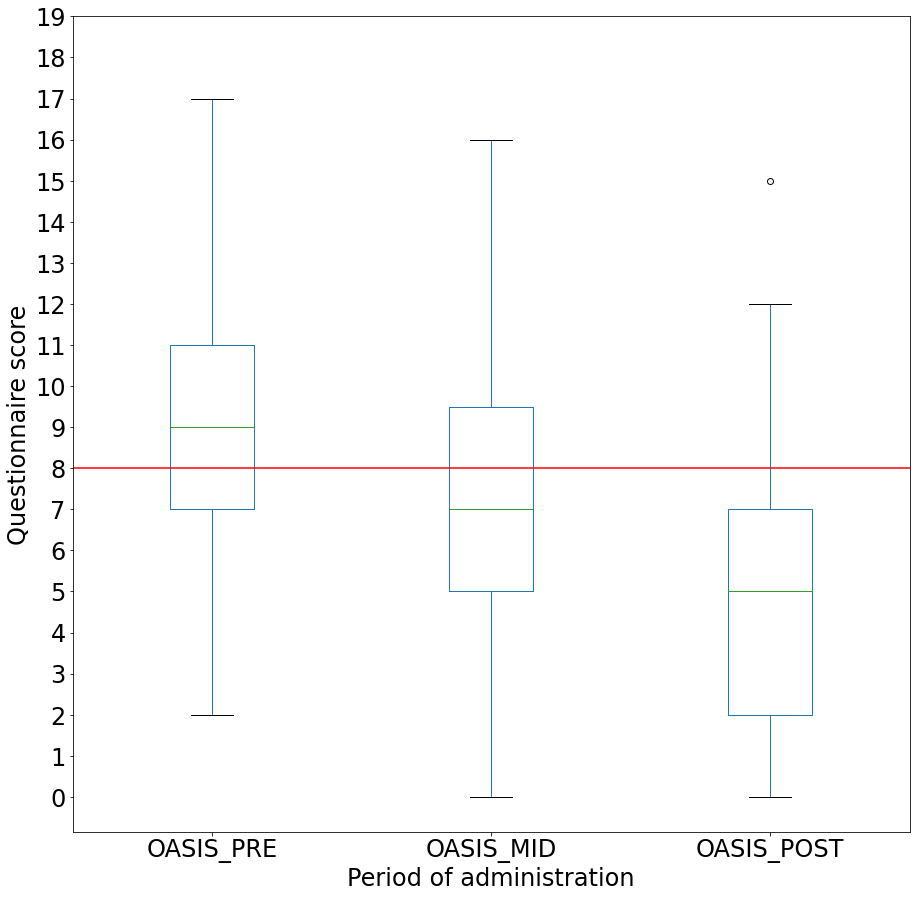

In [41]:

import matplotlib.pyplot as plt 
df[['OASIS_PRE','OASIS_MID','OASIS_POST']].plot(kind='box',figsize = [15,15], yticks =np.arange(0,20,1), grid=False)
plt.axhline(8, c='r' )
plt.rcParams.update({'font.size': 24})
plt.xlabel("Period of administration")
plt.ylabel("Questionnaire score")
plt.savefig('/home/jmocel/trelium/OPTIMAX-sensing/processed_data/oasis_thresholds.png')


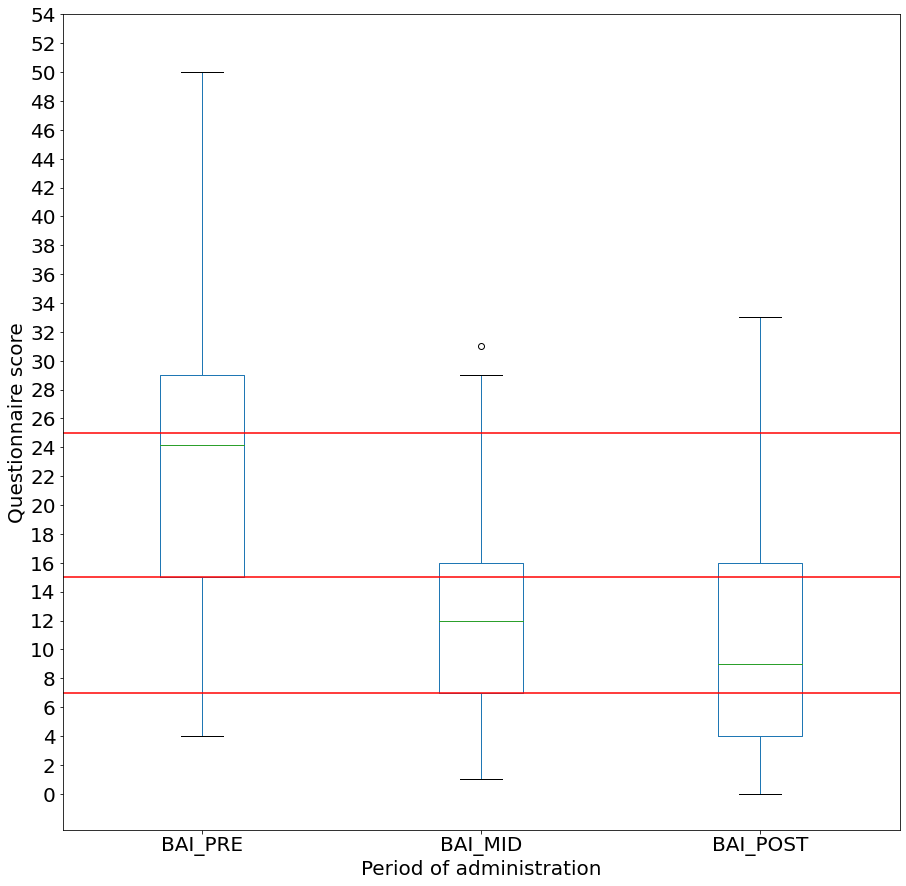

In [47]:
df[['BAI_PRE','BAI_MID','BAI_POST']].dropna().plot(kind='box',figsize = [15,15], yticks =np.arange(0,55,2), grid=False)
plt.axhline(7, c='r' )
plt.axhline(15, c='r' )
plt.axhline(25, c='r' )

plt.rcParams.update({'font.size': 24})
plt.xlabel("Period of administration")
plt.ylabel("Questionnaire score")

plt.savefig('/home/jmocel/trelium/OPTIMAX-sensing/processed_data/bai_thresholds.png')


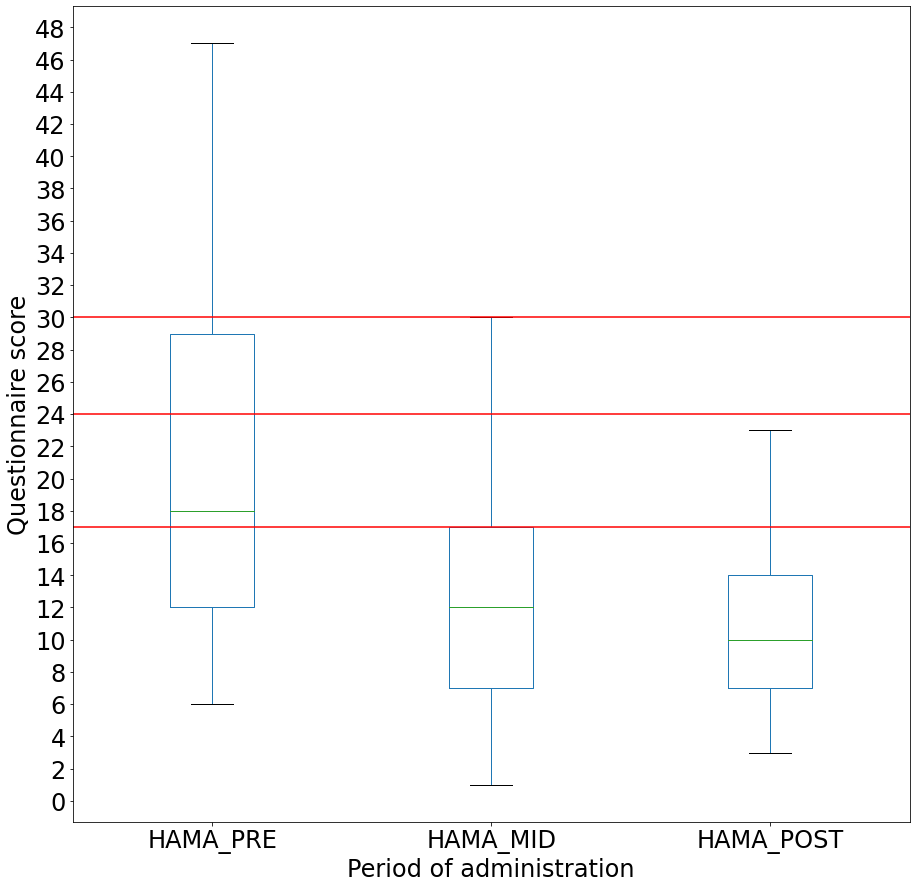

In [50]:
"""
import pandas as pd
import numpy as np
df = pd.read_csv("/home/jmocel/trelium/OPTIMAX-sensing/processed_data/questionnaireGT_final.csv")
import matplotlib.pyplot as plt 
df_clean = df[['HAMA_PRE ','HAMA_MID1 ','HAMA_Post1 ']].replace({'          ': pd.NA, '           ': pd.NA}).dropna()
df_clean['HAMA_MID1 '] = [i.strip(' ') for i in df_clean['HAMA_MID1 ']]
df_clean['HAMA_Post1 '] = [i.strip(' ')for i in df_clean['HAMA_Post1 ']]
df_clean = df_clean.astype({"HAMA_MID1 ": float, "HAMA_Post1 ": float})
df_clean.plot(kind='box',figsize = [15,15], yticks =np.arange(0,50,2), grid=False)

"""
df[['HAMA_PRE','HAMA_MID','HAMA_POST']].dropna().plot(kind='box',figsize = [15,15], yticks =np.arange(0,50,2), grid=False)

# A score of 17 or less indicates mild anxiety severity. A score from 18 to 24 indicates mild to moderate anxiety severity. Lastly, a score of 25 to 30 indicates a moderate to severe anxiety severity.
plt.axhline(17, c='r' )
plt.axhline(24, c='r' )
plt.axhline(30, c='r' )

plt.rcParams.update({'font.size': 24})
plt.xlabel("Period of administration")
plt.ylabel("Questionnaire score")

plt.savefig('/home/jmocel/trelium/OPTIMAX-sensing/processed_data/hama_thresholds.png')



## Participants demographic data 
at location  /opt/data/optimax_sensing/Klinische\ Variabeln_Gesamt_220120_LA.sav





In [51]:
# https://github.com/Roche/pyreadstat
import pandas as pd 
df = pd.read_spss("/opt/data/optimax_sensing/Klinische Variabeln_Gesamt_220120_LA.sav")
df = df[df['VP'].isin(pspart)]
df = df[['VP','Alter','Geschlecht','Herkunft','Familienstand','Einkommen','BDI_PRE','OASIS_PRE']]
#df.columns = ['VP','Age','Gender','Nationality','MaritalStatus','Income']
#alter age Geschlecht gender Herkunft nationality Einkommen income Familienstand marital status #Bildung
df

,VP,Alter,Geschlecht,Herkunft,Familienstand,Einkommen,BDI_PRE,OASIS_PRE
0,102,-66,NaN,-66,NaN,NaN,16.0,11.0
2,104,24,weiblich,Schweiz,ja,71.000 - 90.000 CHF,7.0,11.0
12,124,26,männlich,Schweiz,nein,30.000 - 50.000 CHF,6.0,4.0
19,131,33,weiblich,Schweizerin,ja,71.000 - 90.000 CHF,8.0,4.0
20,134,19,weiblich,Schweiz,nein,51.000 - 70.000 CHF,3.0,9.0
24,141,28,weiblich,CH,ja,51.000 - 70.000 CHF,23.0,11.0
31,149,54,weiblich,CH,ja,71.000 - 90.000 CHF,9.0,5.0
33,154,25,männlich,Schweiz,nein,71.000 - 90.000 CHF,16.0,8.0
42,166,18,weiblich,Oesterreich,nein,71.000 - 90.000 CHF,10.0,10.0
44,181,29,weiblich,Österreich,ja,51.000 - 70.000 CHF,14.0,7.0


In [5]:
print(list(df.columns))


['VP', 'Datum_PRE', 'Alter', 'Geschlecht', 'Herkunft', 'Wohnsituation', 'Wohnsituation_sonst', 'Familienstand', 'Kinder', 'Kinder_Anzahl', 'Bildung', 'Arbeit1', 'Teilzeit1_Prozent', 'Arbeit2', 'Teilzeit2_Prozent', 'Schicht1', 'Schicht2', 'Schicht_AnzahlWoche1', 'Schicht_AnzahlWoche2', 'Schicht_AnzahlMonat1', 'Schicht_AnzahlMonat2', 'Einkommen', 'Alkohol1', 'Alkohol2', 'Rauchen', 'Cannabis', 'Drogen1', 'Drogen2', 'Psychiater', 'Psychiater_Zeit', 'PsychTher', 'PsychTher_Zeit', 'Psychiater_idA', 'Psychiater_idA_Zeit', 'PsychTher_idA', 'PsychTher_idA_Zeit', 'Med', 'Med_Art', 'Med_Zeit', 'Sport1', 'Sport2', 'Sport3', 'Sport4', 'Sport5', 'OASIS1_PRE', 'OASIS2_PRE', 'OASIS3_PRE', 'OASIS4_PRE', 'OASIS5_PRE', 'ODSIS1_PRE', 'ODSIS2_PRE', 'ODSIS3_PRE', 'ODSIS4_PRE', 'ODSIS5_PRE', 'BAI1_PRE', 'BAI2_PRE', 'BAI3_PRE', 'BAI4_PRE', 'BAI5_PRE', 'BAI6_PRE', 'BAI7_PRE', 'BAI8_PRE', 'BAI9_PRE', 'BAI10_PRE', 'BAI11_PRE', 'BAI12_PRE', 'BAI13_PRE', 'BAI14_PRE', 'BAI15_PRE', 'BAI16_PRE', 'BAI17_PRE', 'BAI18_P

In [43]:

len((df[(df['BDI_PRE']>=19) & (df['BDI_PRE']<=29)]))
#len(df[df['Einkommen']=='> 90.000 CHF'])

9

In [55]:
df.groupby(['Geschlecht']).count()

,VP,Alter,Herkunft,Familienstand,Einkommen,BDI_PRE,OASIS_PRE
Geschlecht,,,,,,,
männlich,13,13,13,13,13,13,13
weiblich,19,19,19,19,19,19,19


## Participants EMA data 

Cleaner dataset at: https://github.com/ExPP-Zurich/OPTIMAX-EMA/blob/main/data/optimax_ema_data.csv (needs correction of date/time)

In [5]:
ema_data = pd.read_csv('https://raw.githubusercontent.com/ExPP-Zurich/OPTIMAX-EMA/main/data/optimax_ema_data.csv?token=GHSAT0AAAAAABTCRC7UCMEOHC2GJ7KIA33AYSW26YA')

In [6]:
ema_data

,id,timestamp,timepoint,answered_prompt,interface,anxious,panicked,tachycardia,worried,restles,...,week,day,hour,measperday,absmeas_all,totmeas_all,firstdate_all,week_all,day_all,hour_all
0,102,2018-06-29 08:12:31,1,31.0,MAX,0,0,0,0,0,...,1.0,1.0,0.0,1,1,123,2018-06-29 08:12:31,1.0,1.0,0.0
1,102,2018-06-29 11:25:59,1,32.0,MAX,10,0,9,20,40,...,1.0,1.0,3.0,2,2,123,2018-06-29 08:12:31,1.0,1.0,3.0
2,102,2018-06-29 15:18:29,1,33.0,MAX,1,0,3,16,20,...,1.0,1.0,7.0,3,3,123,2018-06-29 08:12:31,1.0,1.0,7.0
3,102,2018-06-30 09:21:22,1,34.0,MAX,0,0,0,21,0,...,1.0,2.0,25.0,1,4,123,2018-06-29 08:12:31,1.0,2.0,25.0
4,102,2018-06-30 10:40:49,1,35.0,MAX,1,0,0,6,0,...,1.0,2.0,26.0,2,5,123,2018-06-29 08:12:31,1.0,2.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,503,NaN,1,NaN,SEMA3,61,35,41,37,56,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
10400,503,NaN,1,NaN,SEMA3,30,10,10,35,49,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
10401,503,NaN,1,NaN,SEMA3,35,10,15,30,19,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
10402,503,NaN,1,NaN,SEMA3,35,32,18,70,53,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN


In [15]:
import pandas as pd

GESAMTFILE_b = '/opt/data/optimax_sensing/Gesamtfile_EMA_Baseline_bereinigt_29.01.22_MD.xlsx'
GESAMTFILE_m = '/opt/data/optimax_sensing/Gesamtfile_EMA_MID_29.01.22_MD.xlsx'
GESAMTFILE_p = '/opt/data/optimax_sensing/Gesamtfile_EMA_POST_29.01.22_MD.xlsx'

def create_df(path,ema_data):
    """path:path to gesamtfile to take timezones from"""
    df = pd.read_excel(path, engine='openpyxl')
    df = df[['VP','Zeit (1=Lokalzeit, 2=UTC, 3=UTC+1h, 4= Lokalzeit+1h)','Date_Time_last_action (MAX) / completed (SEMA3)']]
    df.columns = ['VP', 'timezone', 'timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format = True)
    df = df.merge(ema_data, how = 'right', on = ['timestamp'])
    
    #timezones = df.groupby('VP')['Zeit (1=Lokalzeit, 2=UTC, 3=UTC+1h, 4= Lokalzeit+1h)'].max().to_frame()
    #df = df.drop_duplicates(subset=['VP']) #delete duplicate rows 

    #df = df.drop(['start_date','end_date'], axis = 1)

    #df = df.merge(start_dates, how = 'left', on = ['pid'])
    #df = df.merge(end_dates, how = 'inner', on = ['pid'])

    return len(df)



In [16]:
create_df(GESAMTFILE_b, ema_data)

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [ ]:
    #this is old code that should not be here
    
    #Generate placeholder values for missing columns 
    df[['fitbit_id','empatica_id']] = None
    df['platform'] = 'infer'
    df['label'] = df['VP']
    df['end_date'] = None #df['Date_Time_last_action (MAX) / completed (SEMA3)']

    #rename and order columns
    df = df[['Teilnehmer Mattermost','fitbit_id','empatica_id','VP','platform','label','Date_Time_last_action (MAX) / completed (SEMA3)','end_date']]
    df.columns = ['device_id','fitbit_id','empatica_id','pid','platform','label','start_date','end_date']

    #drop NAs in pid column 
    df = df.dropna(subset=['pid'])
    df = df.dropna(subset=['device_id'])

    #Convert dtypes
    df = df.astype({"label": int, "pid": int})
    df['start_date'] = pd.to_datetime(df['start_date'], infer_datetime_format = True)
    #df['start_date'] = df['start_date'].dt.round('D') #round to day, yields inaccurate results 


    #group by participant and get first and last date, put in last two columns 
    end_dates = df.groupby('pid')['start_date'].max().to_frame()
    start_dates = df.groupby('pid')['start_date'].min().to_frame()

